In [1]:
# Image Operations (Histogram Equalization, Correlation and Convolution)

(-0.5, 412.5, 412.5, -0.5)

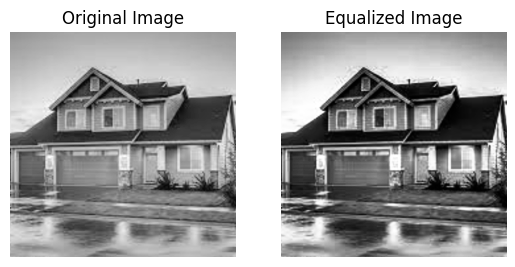

In [2]:
# Using in-built module equalizeHist

import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read image file
image = cv2.imread('/home/dmacs/Desktop/MTech/104P/pic1.png',cv2.IMREAD_GRAYSCALE)

# Apply histogram equalization (inbuilt module)
equalized_image = cv2.equalizeHist(image)

plt.subplot(121)
plt.imshow(image, cmap = 'gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(122)
plt.imshow(equalized_image, cmap = 'gray')
plt.title('Equalized Image')
plt.axis('off')


(-0.5, 511.5, 511.5, -0.5)

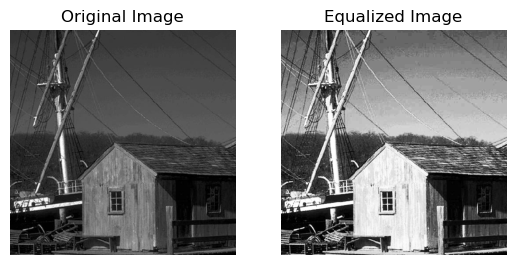

In [7]:
# Without using any inbuilt module

import numpy as np
import matplotlib.pyplot as plt

def calculate_histogram(image):
    histogram = np.zeros(256, dtype = int)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            pixel_value = image[i, j]
            histogram[pixel_value] += 1
    return histogram

def calculate_cdf(histogram):
    cdf = np.zeros(256, dtype=int)
    cdf[0] = histogram[0]
    for i in range(1, 256):
        cdf[i] = cdf[i - 1] + histogram[i]
    return cdf

def histogram_equalization(image, cdf):
    equalized_image = np.zeros_like(image)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            pixel_value = image[i, j]
            equalized_image[i, j] = cdf[pixel_value]
    return equalized_image

# Read image file
image = cv2.imread('/home/dmacs/Desktop/MTech/104P/pic1.png',cv2.IMREAD_GRAYSCALE)

# Calculate histogram
histogram = calculate_histogram(image)

# Calculate cumulative distribution function (CDF)
cdf = calculate_cdf(histogram)

# Normalize the CDF to fit the full intensity range
cdf_normalized = (cdf - cdf.min()) * 255 / (cdf.max() - cdf.min())

# Apply histogram equalization
equalized_image = histogram_equalization(image, cdf_normalized)

plt.subplot(121)
plt.imshow(image, cmap = 'gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(122)
plt.imshow(equalized_image, cmap = 'gray')
plt.title('Equalized Image')
plt.axis('off')


(-0.5, 412.5, 412.5, -0.5)

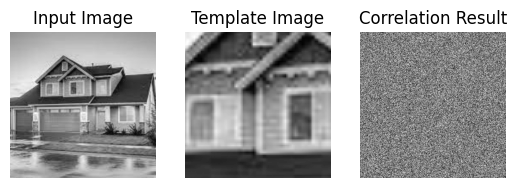

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from scipy.signal import correlate2d

# Load the input image and the template
image = cv2.imread('/home/dmacs/Desktop/MTech/104P/pic1.png',cv2.IMREAD_GRAYSCALE)
template = image[100:201,100:201]

# Ensure both the image and the template are grayscale (if necessary)

# Perform image correlation using numpy's correlate2d function
correlation_result = correlate2d(image, template, mode = 'same', boundary = 'wrap')

plt.subplot(131)
plt.imshow(image, cmap = 'gray')
plt.title('Input Image')
plt.axis('off')

plt.subplot(132)
plt.imshow(template, cmap = 'gray')
plt.title('Template Image')
plt.axis('off')

plt.subplot(133)
plt.imshow(correlation_result, cmap = 'gray')
plt.title('Correlation Result')
plt.axis('off')

(-0.5, 412.5, 412.5, -0.5)

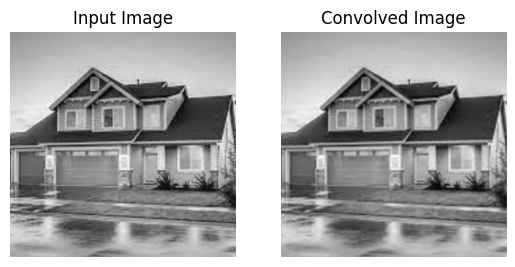

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve2d

# Load the input image
image = cv2.imread('/home/dmacs/Desktop/MTech/104P/pic1.png',cv2.IMREAD_GRAYSCALE)

# Define a simple convolution kernel (e.g., edge detection kernel)
#edge_kernel = np.array([[-1, -1, -1],[-1,  8, -1],[-1, -1, -1]])
gaussian_kernel = np.array([[1, 2, 1],[2, 4, 2],[1, 2, 1]]) / 16.0
gaussian_kernel = np.array([[1, 1, 1],[1, 4, 1],[1, 1, 1]]) / 4

# Perform image convolution using numpy's convolve2d function
convolved_image = convolve2d(image, gaussian_kernel, mode = 'same', boundary = 'wrap')

plt.subplot(121)
plt.imshow(image, cmap = 'gray')
plt.title('Input Image')
plt.axis('off')

plt.subplot(122)
plt.imshow(convolved_image, cmap = 'gray')
plt.title('Convolved Image')
plt.axis('off')
